In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport
import sweetviz as sv

from wordcloud import WordCloud, STOPWORDS

# Carga y tipos de datos

In [2]:
coursera_courses = pd.read_csv('_src/coursera_courses.csv', sep='¦', engine='python')
coursera_reviews = pd.read_csv('_src/coursera_reviews.csv', sep='¦', engine='python')
edx_courses = pd.read_csv('_src/edx_courses.csv', sep='¦', engine='python')
udemy_courses = pd.read_csv('_src/udemy_courses.csv', sep='¦', engine='python')
mooc_courses = pd.read_csv('_src/mooc_courses.csv', sep='¦', engine='python')

In [3]:
coursera_courses

name  \
0                                     Machine Learning   
1                                    Indigenous Canada   
2                            The Science of Well-Being   
3                       Technical Support Fundamentals   
4    Become a CBRS Certified Professional Installer...   
..                                                 ...   
618              Accounting Data Analytics with Python   
619             Introduction to Molecular Spectroscopy   
620                                Managing as a Coach   
621             The fundamentals of hotel distribution   
622                     A Crash Course in Data Science   

                                    institution  \
0                           Stanford University   
1                         University of Alberta   
2                               Yale University   
3                                        Google   
4                     Google - Spectrum Sharing   
..                                          ...   
618  University of Illinois at Urbana-Champaign   
619                 University of Manchester      
620             University of California, Davis   
621                       ESSEC Business School   
622                    Johns Hopkins University   

                                            course_url  \
0      https://www.coursera.org/learn/machine-learning   
1     https://www.coursera.org/learn/indigenous-canada   
2    https://www.coursera.org/learn/the-science-of-...   
3    https://www.coursera.org/learn/technical-suppo...   
4    https://www.coursera.org/learn/google-cbrs-cpi...   
..                                                 ...   
618  https://www.coursera.org/learn/accounting-data...   
619        https://www.coursera.org/learn/spectroscopy   
620  https://www.coursera.org/learn/managing-as-a-c...   
621  https://www.coursera.org/learn/hotel-distribution   
622  https://www.coursera.org/learn/data-science-co...   

                            course_id  
0                    machine-learning  
1                   indigenous-canada  
2           the-science-of-well-being  
3      technical-support-fundamentals  
4            google-cbrs-cpi-training  
..                                ...  
618  accounting-data-analytics-python  
619                      spectroscopy  
620               managing-as-a-coach  
621                hotel-distribution  
622               data-science-course  

[623 rows x 4 columns]

In [4]:
coursera_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


In [5]:
coursera_reviews

reviews        reviewers  \
0       Pretty dry, but I was able to pass with just t...      By Robert S   
1       would be a better experience if the video and ...   By Gabriel E R   
2       Information was perfect! The program itself wa...       By Jacob D   
3       A few grammatical mistakes on test made me do ...        By Dale B   
4       Excellent course and the training provided was...        By Sean G   
...                                                   ...              ...   
519942                                            amazing   By FANISHA A A   
519943                                              great     By Ilona Y Z   
519944                                               Nice      By Aung T K   
519945                                               Good   By Anthony N S   
519946                                               good  By Kasirivu A K   

       date_reviews  rating                 course_id  
0        2020-02-12       4  google-cbrs-cpi-training  
1        2020-09-28       4  google-cbrs-cpi-training  
2        2020-04-08       4  google-cbrs-cpi-training  
3        2020-02-24       4  google-cbrs-cpi-training  
4        2020-06-18       4  google-cbrs-cpi-training  
...             ...     ...                       ...  
519942   2020-10-10       5       computer-networking  
519943   2020-10-07       5       computer-networking  
519944   2020-10-10       5       computer-networking  
519945   2020-10-08       5       computer-networking  
519946   2020-10-07       5       computer-networking  

[519947 rows x 5 columns]

In [6]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519947 entries, 0 to 519946
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       519891 non-null  object
 1   reviewers     519947 non-null  object
 2   date_reviews  519947 non-null  object
 3   rating        519947 non-null  int64 
 4   course_id     519947 non-null  object
dtypes: int64(1), object(4)
memory usage: 19.8+ MB


In [7]:
coursera_reviews['date_reviews'] = pd.to_datetime(coursera_reviews['date_reviews'], format='%Y-%m-%d')

In [8]:
edx_courses

title  \
0                                  How to Learn Online   
1    Programming for Everybody (Getting Started wit...   
2              CS50's Introduction to Computer Science   
3                                   The Analytics Edge   
4    Marketing Analytics: Marketing Measurement Str...   
..                                                 ...   
969  Leaders in Citizen Security and Justice Manage...   
970              Pattern Studying and Making | 图案审美与创作   
971  Computational Neuroscience: Neuronal Dynamics ...   
972  Cities and the Challenge of Sustainable Develo...   
973                      MathTrackX: Special Functions   

                                               summary  n_enrolled  \
0    Learn essential strategies for successful onli...    124980.0   
1    This course is a "no prerequisite" introductio...    293864.0   
2    An introduction to the intellectual enterprise...   2442271.0   
3    Through inspiring examples and stories, discov...    129555.0   
4       This course is part of a MicroMasters® Program     81140.0   
..                                                 ...         ...   
969  Learn about the latest in prevention, police a...         NaN   
970  Fantastic experiences in beauty and its repres...         NaN   
971  This course explains the mathematical and comp...     11246.0   
972  What is a sustainable city? Learn the basics h...      8775.0   
973  Understand trigonometric, exponential and loga...         NaN   

                             course_type  \
0                Self-paced on your time   
1                Self-paced on your time   
2                Self-paced on your time   
3    Instructor-led on a course schedule   
4                Self-paced on your time   
..                                   ...   
969              Self-paced on your time   
970              Self-paced on your time   
971              Self-paced on your time   
972              Self-paced on your time   
973              Self-paced on your time   

                                  institution  \
0                                         edX   
1                  The University of Michigan   
2                          Harvard University   
3       Massachusetts Institute of Technology   
4          University of California, Berkeley   
..                                        ...   
969           Inter-American Development Bank   
970                       Tsinghua University   
971  École polytechnique fédérale de Lausanne   
972                               SDG Academy   
973                    University of Adelaide   

                                           instructors         Level  \
0              Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                    Charles Severance  Introductory   
2                   David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3    Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                       Stephan Sorger  Introductory   
..                                                 ...           ...   
969  Olga Espinoza-Eduardo Pazinato-Alejandra Mera-...  Intermediate   
970                                         Yuehua Nie  Introductory   
971                                   Wulfram Gerstner      Advanced   
972                                   Jeffrey D. Sachs  Introductory   
973                                    Dr David Butler  Introductory   

                          subject language    subtitles  \
0    Education & Teacher Training  English      English   
1                Computer Science  English      English   
2                Computer Science  English      English   
3      Data Analysis & Statistics  English      English   
4                Computer Science  English      English   
..                            ...      ...          ...   
969               Social Sciences  English      English   
970                 Art & Culture       中文  English, 中文 

In [9]:
edx_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   title                      974 non-null    object 
 1   summary                    921 non-null    object 
 2   n_enrolled                 854 non-null    float64
 3   course_type                974 non-null    object 
 4   institution                974 non-null    object 
 5   instructors                971 non-null    object 
 6   Level                      974 non-null    object 
 7   subject                    974 non-null    object 
 8   language                   974 non-null    object 
 9   subtitles                  971 non-null    object 
 10  course_effort_hs_per_week  974 non-null    object 
 11  course_length_weeks        974 non-null    int64  
 12  certificate_price          974 non-null    float64
 13  course_description         934 non-null    object 

In [10]:
edx_courses.n_enrolled = edx_courses.n_enrolled.astype('Int64')
edx_courses.course_type = edx_courses.course_type.astype('category')
edx_courses.Level = edx_courses.Level.astype('category')
edx_courses.language = edx_courses.language.astype('category')

In [11]:
edx_courses['course_effort_hs_per_week'].unique()

array(['2–3', '2–4', '6–18', '10–15', '5–7', '8–10', '1–3', '3–4', '3–5',
       '2–6', '1–2', '2–5', '4–6', '10–30', '6–9', '3–6', '5–10', '4–5',
       '5–8', '5–6', '9–10', '4–8', '15–20', '6–8', '10–14', '10–20',
       '8–12', '4–10', '10–12', '7–10', '3–7', '1–4', '6–10', '1–5',
       '8–9', '6–12', '3–8', '1–10', '10–18', '4–12', '7–14', '7–9',
       '10–11', '16–24', '4–7', '2–10', '11–13', '18–20', '12–16', '9–12',
       '20–28', '7–8', '12–20'], dtype=object)

In [12]:
udemy_courses

course_id                                       course_title  \
0       1070968                 Ultimate Investment Banking Course   
1       1113822  Complete GST Course & Certification - Grow You...   
2       1006314  Financial Modeling for Business Analysts and C...   
3       1210588  Beginner to Pro - Financial Analysis in Excel ...   
4       1011058       How To Maximize Your Profits Trading Options   
...         ...                                                ...   
3667     775618  Learn jQuery from Scratch - Master of JavaScri...   
3668    1088178  How To Design A WordPress Website With No Codi...   
3669     635248                      Learn and Build using Polymer   
3670     905096  CSS Animations: Create Amazing Effects on Your...   
3671     297602  Using MODX CMS to Build Websites: A Beginner's...   

                                                    url  is_paid  price  \
0     https://www.udemy.com/ultimate-investment-bank...     True    200   
1         https://www.udemy.com/goods-and-services-tax/     True     75   
2     https://www.udemy.com/financial-modeling-for-b...     True     45   
3     https://www.udemy.com/complete-excel-finance-c...     True     95   
4     https://www.udemy.com/how-to-maximize-your-pro...     True    200   
...                                                 ...      ...    ...   
3667  https://www.udemy.com/easy-jquery-for-beginner...     True    100   
3668  https://www.udemy.com/how-to-make-a-wordpress-...     True     25   
3669  https://www.udemy.com/learn-and-build-using-po...     True     40   
3670  https://www.udemy.com/css-animations-create-am...     True     50   
3671  https://www.udemy.com/using-modx-cms-to-build-...     True     45   

      num_subscribers  num_reviews  num_lectures               level  \
0                2147           23            51          All Levels   
1                2792          923           274          All Levels   
2                2174           74            51  Intermediate Level   
3                2451           11            36          All Levels   
4                1276           45            26  Intermediate Level   
...               ...          ...           ...                 ...   
3667             1040           14            21          All Levels   
3668              306            3            42      Beginner Level   
3669              513          169            48          All Levels   
3670              300           31            38          All Levels   
3671              901           36            20      Beginner Level   

      content_duration published_timestamp           subject  
0                  1.5          2017-01-18  Business Finance  
1                 39.0          2017-03-09  Business Finance  
2                  2.5          2016-12-19  Business Finance  
3                  3.0          2017-05-30  Business Finance  
4                  2.0          2016-12-13  Business Finance  
...                ...                 ...               ...  
3667               2.0          2016-06-14   Web Development  
3668               3.5          2017-03-10   Web Development  
3669               3.5          2015-12-30   Web Development  
3670               3.0          2016-08-11   Web Development  
3671               2.0          2014-09-28   Web Development  

[3672 rows x 12 columns]

In [13]:
udemy_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3672 non-null   int64  
 1   course_title         3672 non-null   object 
 2   url                  3672 non-null   object 
 3   is_paid              3672 non-null   bool   
 4   price                3672 non-null   int64  
 5   num_subscribers      3672 non-null   int64  
 6   num_reviews          3672 non-null   int64  
 7   num_lectures         3672 non-null   int64  
 8   level                3672 non-null   object 
 9   content_duration     3672 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              3672 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.3+ KB


In [14]:
udemy_courses.level = udemy_courses.level.astype('category')
udemy_courses.subject = udemy_courses.subject.astype('category')
#udemy_courses['published_timestamp'] = pd.to_datetime(udemy_courses['published_timestamp'], format='%Y-%m-%d %H:%M:%S')
udemy_courses['published_timestamp'] = pd.to_datetime(udemy_courses['published_timestamp'], format='%Y-%m-%d')

In [15]:
mooc_courses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5269 entries, 0 to 5268
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            4295 non-null   object 
 1   title                5269 non-null   object 
 2   is_paid              5269 non-null   bool   
 3   price                5269 non-null   int64  
 4   certificate_price    4646 non-null   float64
 5   num_subscribers      4526 non-null   float64
 6   num_reviews          3672 non-null   float64
 7   num_lectures         3672 non-null   float64
 8   level                4646 non-null   object 
 9   content_duration     4646 non-null   float64
 10  published_timestamp  3672 non-null   object 
 11  subject              4646 non-null   object 
 12  summary              921 non-null    object 
 13  course_type          974 non-null    object 
 14  institution          1597 non-null   object 
 15  instructors          971 non-null    o

In [16]:
mooc_courses.is_paid.unique()

array([False,  True])

In [17]:
#mooc_courses.num_subscribers = mooc_courses.num_subscribers.astype('Int64')
mooc_courses.course_type = mooc_courses.course_type.astype('category')
mooc_courses.language = mooc_courses.language.astype('category')

mooc_courses.level = mooc_courses.level.astype('category')
mooc_courses.is_paid = mooc_courses.is_paid.astype('category')
mooc_courses.dataset = mooc_courses.dataset.astype('category')
mooc_courses.subject = mooc_courses.subject.astype('category')
#mooc_courses['published_timestamp'] = pd.to_datetime(mooc_courses['published_timestamp'], format='%Y-%m-%d %H:%M:%S')
mooc_courses['published_timestamp'] = pd.to_datetime(mooc_courses['published_timestamp'], format='%Y-%m-%d')

# WordCloud

coursea reviews

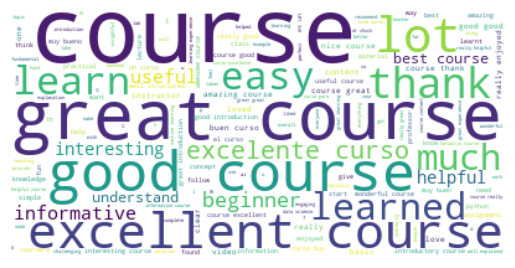

In [18]:
wordcloud = WordCloud(background_color ='white').generate(coursera_reviews['reviews'].to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Cursos

coursea & udemy & edx

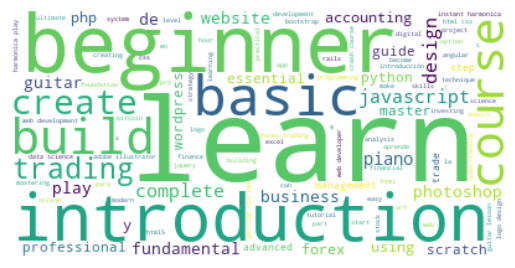

In [19]:
wordcloud = WordCloud(background_color ='white').generate(mooc_courses['title'].dropna().to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

quitando palabras que normalmente aparecerían en un curso así como 'aprender' o 'crear' o 'diseñar' quedaría así.

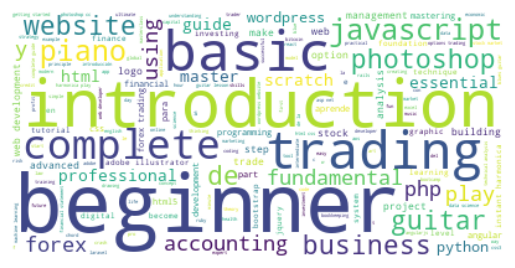

In [20]:
words = ['course', 'learn', 'create', 'design', 'build']
stopwords = set(STOPWORDS)
for word in words:
    stopwords.add(word)

wordcloud = WordCloud(stopwords = stopwords, background_color ='white').generate(mooc_courses['title'].dropna().to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Como se puede apreciar las palabras más repetidas dentro de los titulos de cada curso son: introduction, beginner, basic o fundamental. Todo esto, junto con que la palabra que más se repite (*learn*), nos da una clara tendencia hacia los cursos introductorios.

también se manifiesta este patrón en el nivel de cada curso, incluso la la frecuencia de las palabras bajan según sube el nivel (beginner, intermediate, advanced).

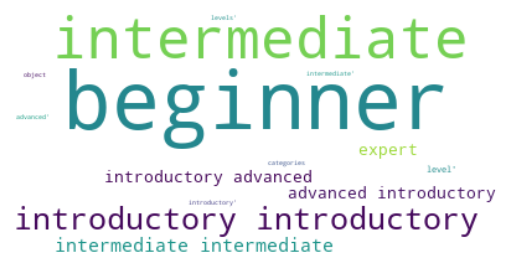

In [21]:
words = ['level', 'levels']
stopwords = set(STOPWORDS)
for word in words:
    stopwords.add(word)

wordcloud = WordCloud(stopwords = stopwords, background_color ='white').generate(mooc_courses['level'].dropna().to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# proffiling

In [22]:
#analyzing the dataset
#advert_report = sv.analyze(mooc_courses[mooc_courses.is_paid.notna()])
#display the report
#advert_report.show_html('Advertising.html')

Existen muchos cursos de pago. Casi triplica la cantidad de cursos gratuitos

In [23]:
ProfileReport(mooc_courses)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Se puede observar en la columna *content_duration* que cada vez hay menos cursos mientras sube la duración del contenido. Esto tiene sentido teniendo en cuenta que muchos de los cursos son introductorios.

Respecto a la columna de fecha, se puede ver que se fue popularizando el dar cursos online. Sólo queda por ver qué se popularizó antes: el dar cursos, o el anotarse a ellos.

# Análisis individual

### Coursera

In [24]:
coursera_courses.head()

name  \
0                                   Machine Learning   
1                                  Indigenous Canada   
2                          The Science of Well-Being   
3                     Technical Support Fundamentals   
4  Become a CBRS Certified Professional Installer...   

                 institution  \
0        Stanford University   
1      University of Alberta   
2            Yale University   
3                     Google   
4  Google - Spectrum Sharing   

                                          course_url  \
0    https://www.coursera.org/learn/machine-learning   
1   https://www.coursera.org/learn/indigenous-canada   
2  https://www.coursera.org/learn/the-science-of-...   
3  https://www.coursera.org/learn/technical-suppo...   
4  https://www.coursera.org/learn/google-cbrs-cpi...   

                        course_id  
0                machine-learning  
1               indigenous-canada  
2       the-science-of-well-being  
3  technical-support-fundamentals  
4        google-cbrs-cpi-training

In [25]:
from collections import Counter
courses_count = Counter(list(coursera_courses.course_id.unique()) + list(coursera_reviews.course_id.unique()))

In [26]:
print( 'cursos sin review: ', len({x: count for x, count in courses_count.items() if count != 2}))
print( 'cursos con review: ', len({x: count for x, count in courses_count.items() if count >= 2}))

cursos sin review:  19
cursos con review:  604


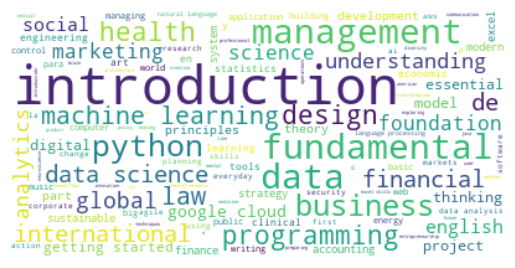

In [27]:
wordcloud = WordCloud(background_color ='white').generate(coursera_courses['name'].dropna().to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#### reviews

### edx

In [28]:
edx_courses.head()

title  \
0                                How to Learn Online   
1  Programming for Everybody (Getting Started wit...   
2            CS50's Introduction to Computer Science   
3                                 The Analytics Edge   
4  Marketing Analytics: Marketing Measurement Str...   

                                             summary  n_enrolled  \
0  Learn essential strategies for successful onli...      124980   
1  This course is a "no prerequisite" introductio...      293864   
2  An introduction to the intellectual enterprise...     2442271   
3  Through inspiring examples and stories, discov...      129555   
4     This course is part of a MicroMasters® Program       81140   

                           course_type                            institution  \
0              Self-paced on your time                                    edX   
1              Self-paced on your time             The University of Michigan   
2              Self-paced on your time                     Harvard University   
3  Instructor-led on a course schedule  Massachusetts Institute of Technology   
4              Self-paced on your time     University of California, Berkeley   

                                         instructors         Level  \
0            Nina Huntemann-Robyn Belair-Ben Piscopo  Introductory   
1                                  Charles Severance  Introductory   
2                 David J. Malan-Doug Lloyd-Brian Yu  Introductory   
3  Dimitris Bertsimas-Allison O'Hair-John Silberh...  Intermediate   
4                                     Stephan Sorger  Introductory   

                        subject language subtitles course_effort_hs_per_week  \
0  Education & Teacher Training  English   English                       2–3   
1              Computer Science  English   English                       2–4   
2              Computer Science  English   English                      6–18   
3    Data Analysis & Statistics  English   English                     10–15   
4              Computer Science  English   English                       5–7   

   course_length_weeks  certificate_price  \
0                    2               49.0   
1                    7               49.0   
2                   12               90.0   
3                   13              199.0   
4                    4              249.0   

                                  course_description  \
0  Designed for those who are new to elearning, t...   
1  This course aims to teach everyone the basics ...   
2  This is CS50x , Harvard University's introduct...   
3  In the last decade, the amount of data availab...   
4  Begin your journey in a new career in marketin...   

                                     course_syllabus  \
0  Welcome - We start with opportunities to meet ...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                          course_url  
0     https://www.edx.org/course/how-to-learn-online  
1  https://www.edx.org/course/programming-for-eve...  
2  https://www.edx.org/course/cs50s-introduction-...  
3      https://www.edx.org/course/the-analytics-edge  
4  https://www.edx.org/course/marketing-analytics...

In [29]:
edx_courses['course_effort_hs_per_week'].str.split('–',expand=True)[0]

0       2
1       2
2       6
3      10
4       5
       ..
969     4
970     3
971     4
972     1
973     3
Name: 0, Length: 974, dtype: object

<AxesSubplot: title={'center': 'frecuencia de suscripcion (Escala logaritmica)'}, xlabel='n_enrolled', ylabel='Count'>

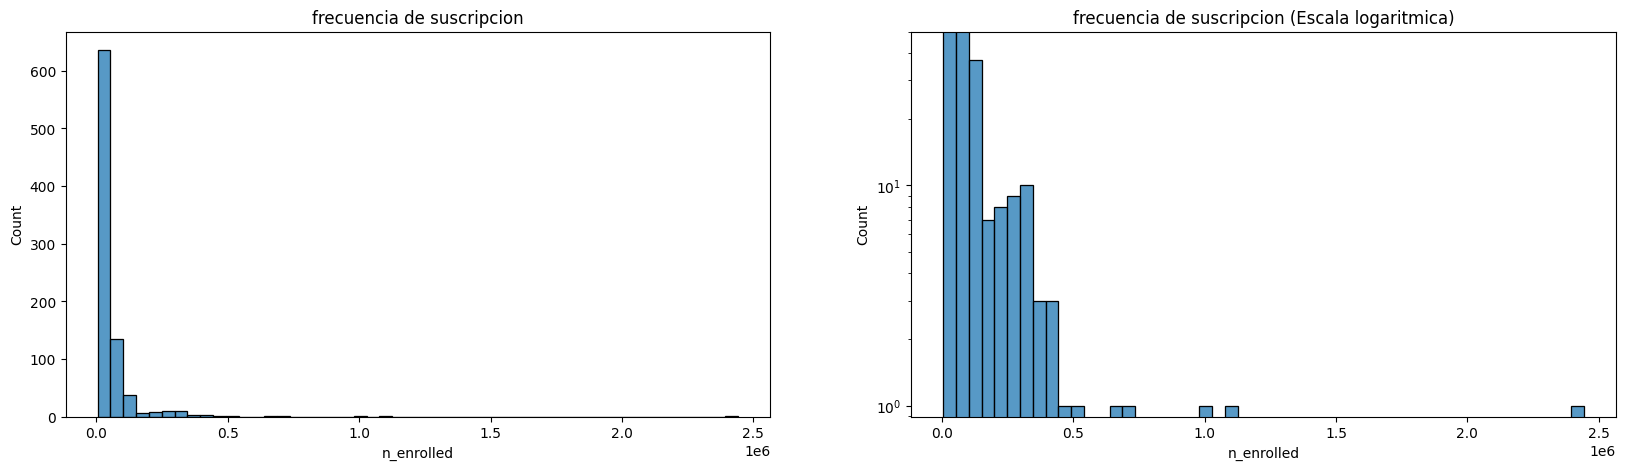

In [30]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('frecuencia de suscripcion')
plt.yscale("log")
sns.histplot(edx_courses[edx_courses['n_enrolled'] != 0], x='n_enrolled', bins=50, ax=ax[0])
ax[1].set_title('frecuencia de suscripcion (Escala logaritmica)')
plt.ylim(0,50)
sns.histplot(edx_courses[edx_courses['n_enrolled'] != 0], x='n_enrolled', bins=50, ax=ax[1])

Si bien estos cursos son gratuitos, se puede pagar un monto para conseguir un certificado que valida los conocimientos. Aún así es interesante explorarlo ya que son ganancias para la plataforma.

<AxesSubplot: xlabel='certificate_price', ylabel='n_enrolled'>

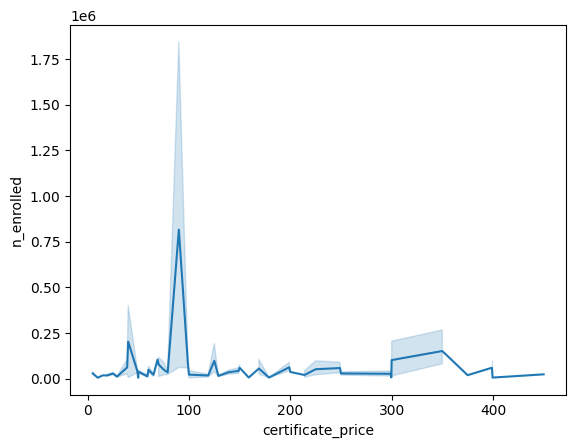

In [31]:
sns.lineplot(edx_courses, x='certificate_price', y='n_enrolled', estimator='mean')

Vemos que se tiene poca preferencia de precio ya que el certificado es opcional

<AxesSubplot: xlabel='course_length_weeks', ylabel='n_enrolled'>

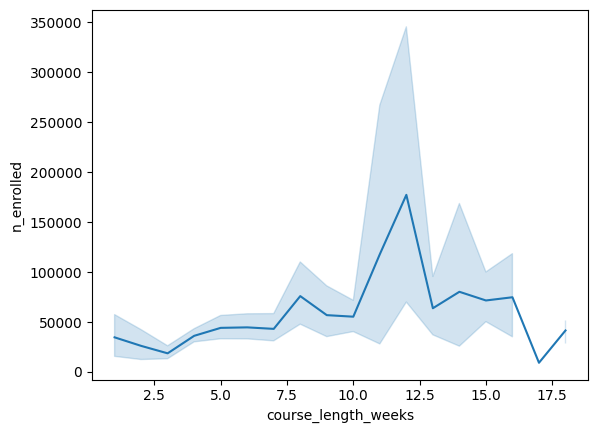

In [32]:
sns.lineplot(edx_courses, x='course_length_weeks', y='n_enrolled', estimator='mean')

#### lenguaje

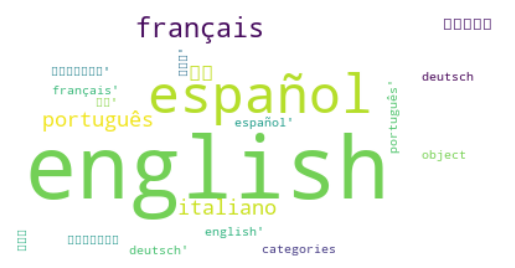

In [33]:
wordcloud = WordCloud(background_color ='white').generate(edx_courses['language'].to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

plt.show()

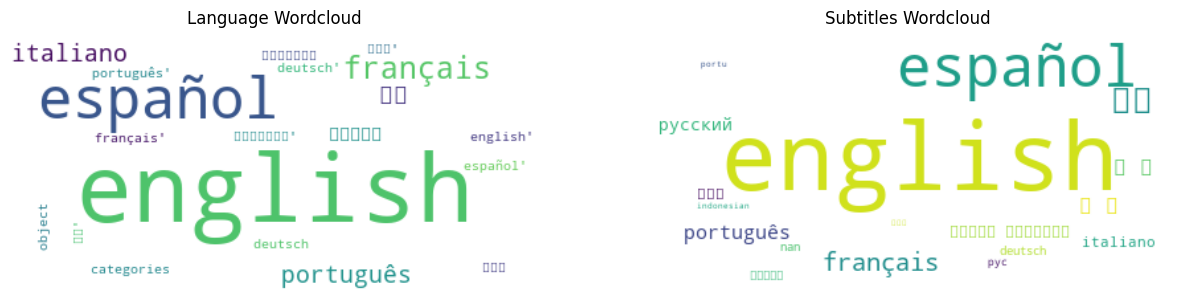

In [64]:
plt.rcParams['font.family'] = ['DejaVu Sans', 'Nirmala UI']
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color ='white').generate(edx_courses['language'].to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Language Wordcloud")
plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color ='white').generate(edx_courses['subtitles'].to_string().strip().lower())
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Subtitles Wordcloud")
plt.show()

<AxesSubplot: xlabel='certificate_price', ylabel='language'>

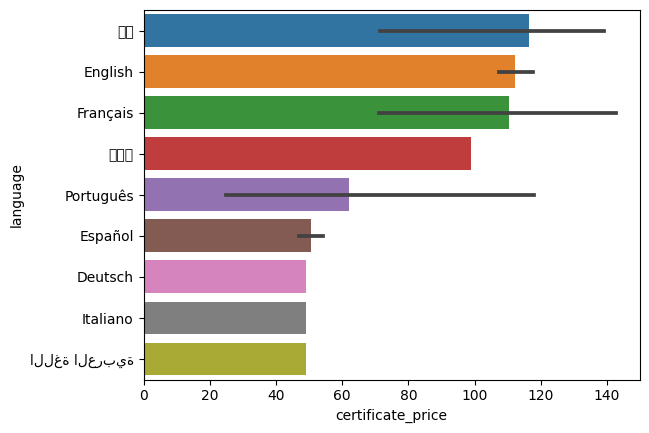

In [61]:
plt.rcParams['font.family'] = ['DejaVu Sans', 'SimSum', 'Nirmala UI']
sns.barplot(edx_courses, y='language', x='certificate_price', order=edx_courses.groupby('language').mean().sort_values('certificate_price', ascending=False).index)

#### nivel

<AxesSubplot: xlabel='Level', ylabel='certificate_price'>

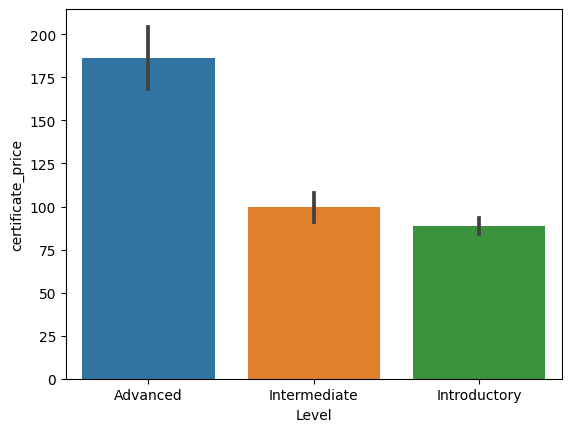

In [50]:
sns.barplot(edx_courses, x='Level', y='certificate_price', order=edx_courses.groupby('Level').mean().sort_values('certificate_price', ascending=False).index)

Se nota que los cursos más avanzados son los más costosos de verificar

<AxesSubplot: xlabel='certificate_price', ylabel='subject'>

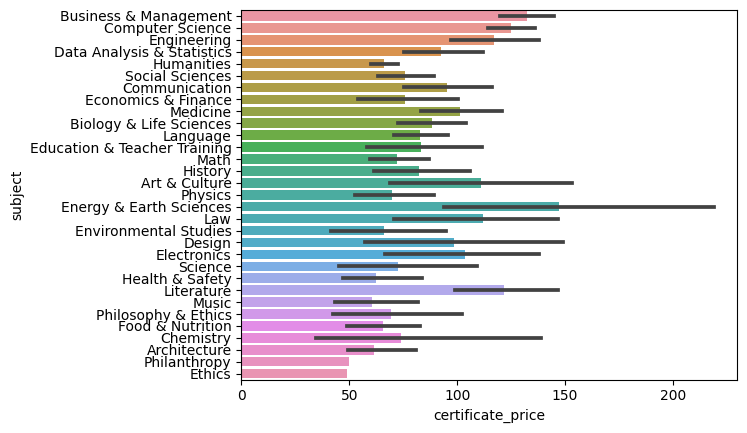

In [139]:
sns.barplot(edx_courses, y='subject', x='certificate_price', order=edx_courses.groupby('subject').mean().sort_values('certificate_price', ascending=False).index)

### udemy

In [29]:
udemy_courses.describe()

course_id        price  num_subscribers   num_reviews  num_lectures  \
count  3.672000e+03  3672.000000      3672.000000   3672.000000   3672.000000   
mean   6.758977e+05    66.102941      3190.586874    156.371460     40.140251   
std    3.430720e+05    61.035920      9488.105448    936.178649     50.417102   
min    8.324000e+03     0.000000         0.000000      0.000000      0.000000   
25%    4.077615e+05    20.000000       111.750000      4.000000     15.000000   
50%    6.876920e+05    45.000000       912.000000     18.000000     25.000000   
75%    9.608140e+05    95.000000      2548.750000     67.000000     46.000000   
max    1.282064e+06   200.000000    268923.000000  27445.000000    779.000000   

       content_duration  
count       3672.000000  
mean           4.097603  
std            6.057830  
min            0.000000  
25%            1.000000  
50%            2.000000  
75%            4.500000  
max           78.500000

In [30]:
true, false = udemy_courses.is_paid.value_counts()
print('', round((false / true) * 100, 1),'% son cursos gratuitos')

 9.2 % son cursos gratuitos


In [31]:
udemy_courses[udemy_courses['is_paid'] != False].head()

course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   
1             2792          923           274          All Levels   
2             2174           74            51  Intermediate Level   
3             2451           11            36          All Levels   
4             1276           45            26  Intermediate Level   

   content_duration published_timestamp           subject  
0               1.5          2017-01-18  Business Finance  
1              39.0          2017-03-09  Business Finance  
2               2.5          2016-12-19  Business Finance  
3               3.0          2017-05-30  Business Finance  
4               2.0          2016-12-13  Business Finance

#### Populares

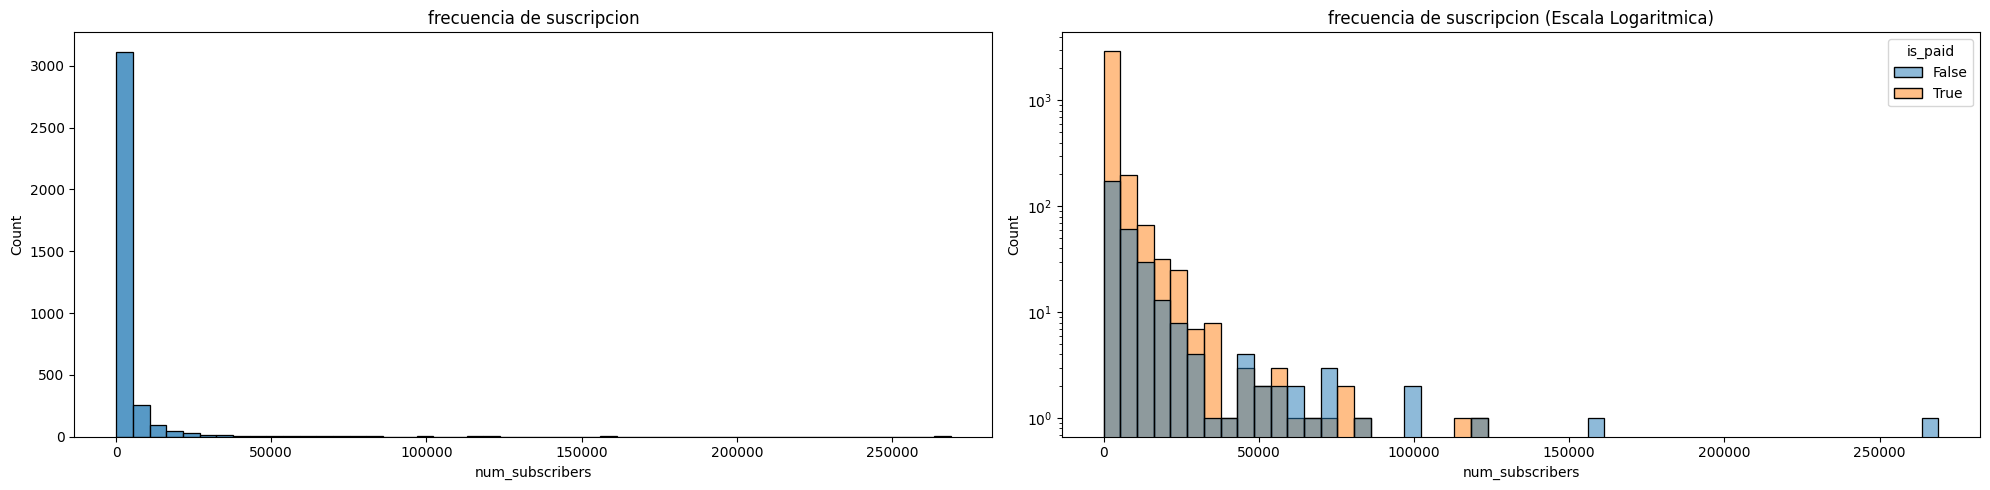

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.histplot(udemy_courses[udemy_courses['num_subscribers'] != 0], x='num_subscribers', bins=50)
plt.title('frecuencia de suscripcion')


plt.subplot(1, 2, 2)
sns.histplot(udemy_courses[udemy_courses['num_subscribers'] != 0], x='num_subscribers', bins=50, hue='is_paid')
plt.title('frecuencia de suscripcion (Escala Logaritmica)')
plt.yscale('log')

plt.tight_layout()
plt.show()

Vemos que lo normal es que hayan menos de tres mil suscriptores en cada curso, pero que también hay cursos muy populares que destacan en el número de suscriptores.

Además 

In [34]:
udemy_courses[udemy_courses['is_paid'] == False].sort_values('num_subscribers', ascending=False).head()

course_id                                       course_title  \
2821      41295               Learn HTML5 Programming From Scratch   
3026      59014                     Coding for Entrepreneurs Basic   
2777     173548  Build Your First Website in 1 Week with HTML5 ...   
1891      19421              Free Beginner Electric Guitar Lessons   
2583     473160  Web Design for Web Developers: Build Beautiful...   

                                                    url  is_paid  price  \
2821  https://www.udemy.com/learn-html5-programming-...    False      0   
3026  https://www.udemy.com/coding-for-entrepreneurs...    False      0   
2777  https://www.udemy.com/build-your-first-website...    False      0   
1891  https://www.udemy.com/beginner-electric-guitar...    False      0   
2583          https://www.udemy.com/web-design-secrets/    False      0   

      num_subscribers  num_reviews  num_lectures           level  \
2821           268923         8629            45      All Levels   
3026           161029          279            27  Beginner Level   
2777           120291         5924            30  Beginner Level   
1891           101154         1042            95  Beginner Level   
2583            98867         6512            20      All Levels   

      content_duration published_timestamp              subject  
2821              10.5          2013-02-14      Web Development  
3026               3.5          2013-06-09      Web Development  
2777               3.0          2014-04-08      Web Development  
1891               4.5          2012-06-15  Musical Instruments  
2583               3.0          2015-04-13      Web Development

In [35]:
popular = udemy_courses[udemy_courses['is_paid'] == False].sort_values('num_subscribers', ascending=False).reset_index().copy()
popular['top30'] = 'Otros'
popular.loc[:30,('top30')] = 'Top30'

De hecho si tomamos el 5% de los cursos, conseguimos alcanzar la cantidad de suscriptores de los demás cursos.

In [36]:
print(round(30 / popular.shape[0] * 100,1), '%')

9.7 %


In [37]:
pivote = pd.pivot_table(popular, index= 'top30', values='num_subscribers', aggfunc='sum').reset_index()
pivote

top100  num_subscribers
0    Otros          1614211
1  Top 100          1961314

[Text(0, 0, '1.61421e+06'), Text(0, 0, '1.96131e+06')]

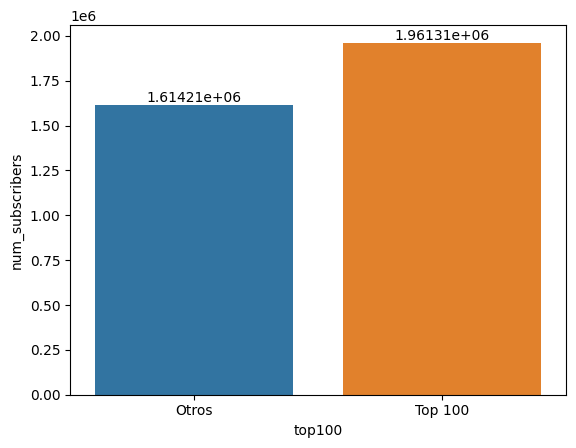

In [38]:
ax = sns.barplot(pivote, x='top30', y='num_subscribers')
ax.bar_label(ax.containers[0])


#### suscriptores - fecha

<AxesSubplot: xlabel='published_timestamp', ylabel='num_subscribers'>

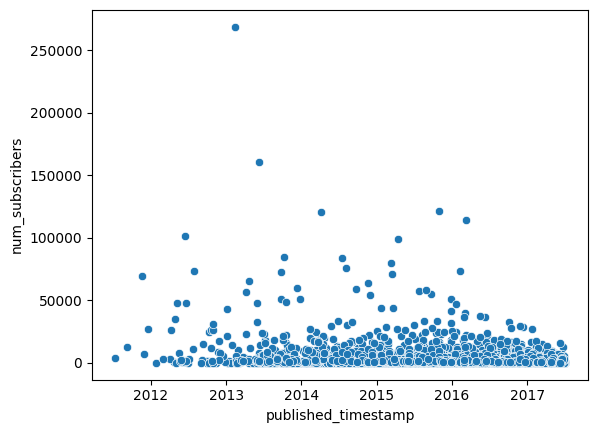

In [39]:
sns.scatterplot(udemy_courses,x='published_timestamp', y='num_subscribers')

A

In [40]:
udemy_courses.resample(rule='q', on='published_timestamp').sum().reset_index()

published_timestamp  course_id  is_paid  price  num_subscribers  \
0           2011-09-30      16649        2     40            16155   
1           2011-12-31      33802        3    270           102873   
2           2012-03-31      27787        2     85             3145   
3           2012-06-30     301678       15    480           280294   
4           2012-09-30     128823        5    230           104440   
5           2012-12-31     527432       19   1040           167460   
6           2013-03-31    1404582       33   2220           393041   
7           2013-06-30    2900752       32   2075           489693   
8           2013-09-30    4285783       58   3440           329464   
9           2013-12-31    7023174       61   3050           467955   
10          2014-03-31   16419644       99   5305           337037   
11          2014-06-30   26662426      113   5195           484574   
12          2014-09-30   25434152       80   4010           577016   
13          2014-12-31   50764715      146   9270           531779   
14          2015-03-31   83221998      194  12035           812784   
15          2015-06-30  100838364      201  15620           659725   
16          2015-09-30  166248872      285  19365          1002042   
17          2015-12-31  182005527      272  20810          1000773   
18          2016-03-31  238958072      298  20535          1102716   
19          2016-06-30  246007145      279  18920           644120   
20          2016-09-30  245364955      254  18015           525138   
21          2016-12-31  281213629      276  26695           694670   
22          2017-03-31  328248803      283  26065           575544   
23          2017-06-30  440550748      329  26140           411699   
24          2017-09-30   33306836       23   1820             1698   

    num_reviews  num_lectures  content_duration  
0           448           130          7.000000  
1          3593           444         44.000000  
2            68           119         10.500000  
3          3583           720         68.100000  
4          3382           238         24.000000  
5          3239          1297        176.233333  
6         12441           920        133.500000  
7         12231          1805        214.083333  
8          9681          2586        317.016667  
9         13707          1926        341.600000  
10         9373          4150        571.183333  
11        16479          4029        481.733333  
12        36016          3442        346.133333  
13        24799          7658        789.466667  
14        58147          9086        856.366667  
15        25420          9171        795.716667  
16        39261         12631       1181.483333  
17        73982         11042       1057.033333  
18        90153         13375       1387.366667  
19        38639         12216       1260.033333  
20        30465          9974        940.950000  
21        36172         15259       1496.016667  
22        24219         12502       1275.933333  
23         8678         12092       1208.933333  
24           20           583         62.016667

In [44]:
grouped_udemy = udemy_courses.resample(rule='q', on='published_timestamp').sum().reset_index()
grouped_udemy['count'] = udemy_courses.resample(rule='q', on='published_timestamp').agg({"course_id":len}).reset_index()['course_id']
grouped_udemy.head()

published_timestamp  course_id  is_paid  price  num_subscribers  \
0          2011-09-30      16649        2     40            16155   
1          2011-12-31      33802        3    270           102873   
2          2012-03-31      27787        2     85             3145   
3          2012-06-30     301678       15    480           280294   
4          2012-09-30     128823        5    230           104440   

   num_reviews  num_lectures  content_duration  count  
0          448           130               7.0      2  
1         3593           444              44.0      3  
2           68           119              10.5      2  
3         3583           720              68.1     17  
4         3382           238              24.0      6

<AxesSubplot: xlabel='published_timestamp', ylabel='num_subscribers'>

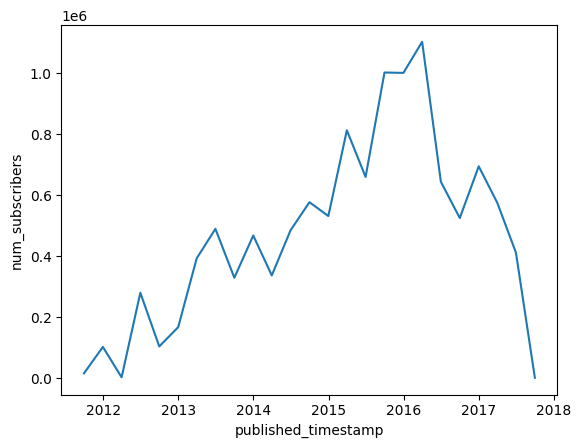

In [45]:
sns.lineplot(grouped_udemy, x='published_timestamp', y='num_subscribers')

In [181]:
from sklearn import preprocessing
def dataframe_normalize(data, ignore):
    
    df = data.drop(columns=[ignore]).copy()
    
    
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)

    count = 0
    for i in data.drop(columns=[ignore]).columns:
        df.rename({count:i}, axis=1, inplace=True)
        count += 1

    return pd.concat([df, data[ignore]], axis=1)

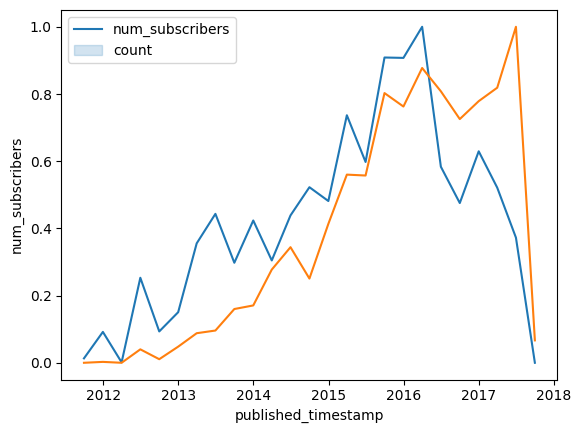

In [182]:

sns.lineplot(dataframe_normalize(grouped_udemy, ignore='published_timestamp'), x='published_timestamp', y='num_subscribers')

sns.lineplot(dataframe_normalize(grouped_udemy, ignore='published_timestamp'), x='published_timestamp', y='count')
plt.legend(['num_subscribers', 'count'])

plt.show()

#### precio - suscriptores

<AxesSubplot: xlabel='price', ylabel='num_subscribers'>

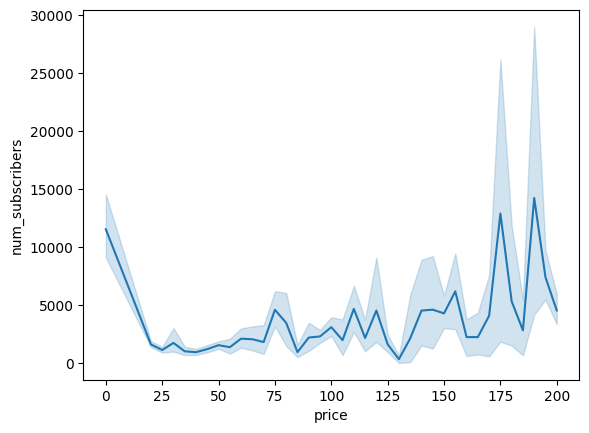

In [34]:
sns.lineplot(udemy_courses, x='price', y='num_subscribers')

In [184]:
udemy_courses[udemy_courses['is_paid'] == True].sort_values('num_subscribers', ascending=False).reset_index().copy()

index  course_id                                       course_title  \
0      3224     625204                         The Web Developer Bootcamp   
1      3226     764164              The Complete Web Developer Course 2.0   
2      2613      94430             Learn Javascript & JQuery From Scratch   
3      3241     364426          JavaScript: Understanding the Weird Parts   
4      1974     238934  Pianoforall - Incredible New Way To Learn Pian...   
...     ...        ...                                                ...   
3357   1617    1252410  Beginners Guide to Kindle Ebook Covers Design ...   
3358    779    1249146  Planning and Executing a Financial Statement A...   
3359    778    1035638                 Understanding Financial Statements   
3360    777    1215926                Kickstarter success in 5 easy steps   
3361   2397    1214670                  Tune that Sour Note on Your Piano   

                                                    url  is_paid  price  \
0     https://www.udemy.com/the-web-developer-bootcamp/     True    200   
1     https://www.udemy.com/the-complete-web-develop...     True    200   
2     https://www.udemy.com/learn-javascript-jquery-...     True     30   
3          https://www.udemy.com/understand-javascript/     True    175   
4     https://www.udemy.com/pianoforall-incredible-n...     True    200   
...                                                 ...      ...    ...   
3357  https://www.udemy.com/beginners-guide-to-kindl...     True     20   
3358  https://www.udemy.com/planning-executing-finan...     True     50   
3359  https://www.udemy.com/understanding-financial-...     True     25   
3360  https://www.udemy.com/kickstarter-success-in-5...     True     20   
3361  https://www.udemy.com/how-to-tune-your-own-piano/     True     20   

      num_subscribers  num_reviews  num_lectures               level  \
0              121584        27445           342          All Levels   
1              114512        22412           304          All Levels   
2               84897         2685            10          All Levels   
3               79612        16976            85          All Levels   
4               75499         7676           362          All Levels   
...               ...          ...           ...                 ...   
3357                0            0            16          All Levels   
3358                0            0             9  Intermediate Level   
3359                0            0            10          All Levels   
3360                0            0            12          All Levels   
3361                0            0             6          All Levels   

      content_duration published_timestamp              subject  
0            43.000000          2015-11-02      Web Development  
1            30.500000          2016-03-08      Web Development  
2             2.000000          2013-10-10      Web Development  
3            11.500000          2015-03-12      Web Development  
4            30.000000          2014-08-07  Musical Instruments  
...                ...                 ...                  ...  
3357          1.500000          2017-06-19       Graphic Design  
3358          2.000000          2017-06-29     Business Finance  
3359          1.000000          2016-12-15     Business Finance  
3360          0.516667          2017-05-16     Business Finance  
3361          0.550000          2017-06-20  Musical Instruments  

[3362 rows x 13 columns]

#### duracion - suscriptores

<AxesSubplot: xlabel='content_duration', ylabel='Count'>

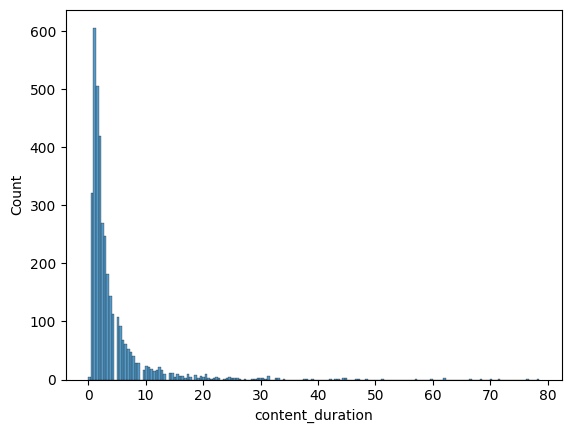

In [101]:
sns.histplot(udemy_courses, x='content_duration')

In [89]:
grouped_udemy = udemy_courses.groupby('level').mean().reset_index()

<AxesSubplot: xlabel='content_duration', ylabel='num_subscribers'>

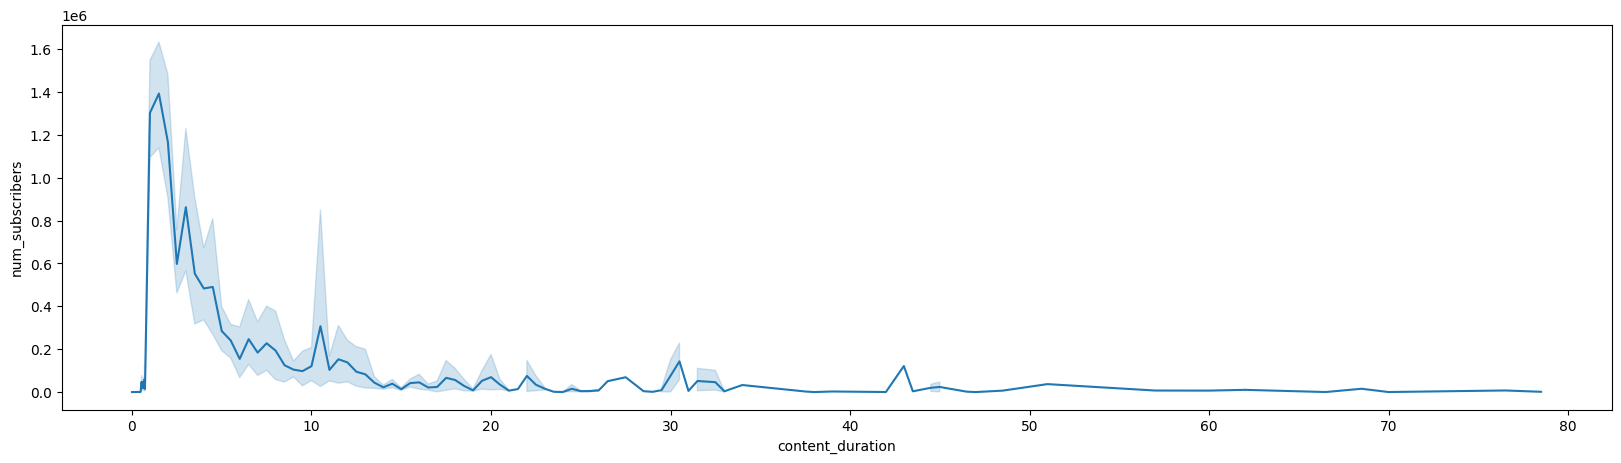

In [43]:
plt.figure(figsize=(20,5))
sns.lineplot(udemy_courses, x='content_duration', y='num_subscribers', estimator='sum')

<AxesSubplot: xlabel='content_duration', ylabel='num_subscribers'>

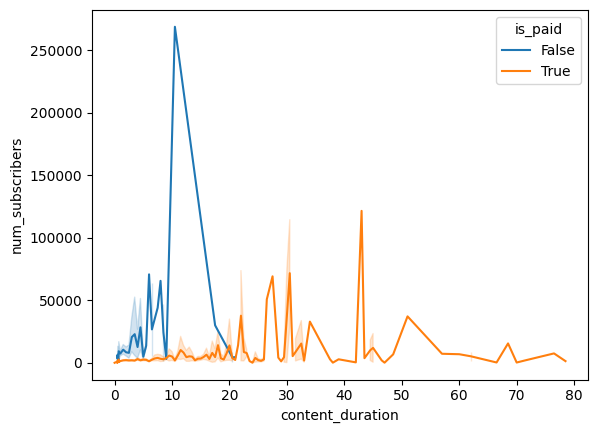

In [115]:
sns.lineplot(udemy_courses, x='content_duration', y='num_subscribers', hue='is_paid', estimator='mean')

#### levl

In [147]:
udemy_courses.groupby('level').mean().sort_values('price', ascending=False).index

CategoricalIndex(['Expert Level', 'All Levels', 'Intermediate Level',
                  'Beginner Level'],
                 categories=['All Levels', 'Beginner Level', 'Expert Level', 'Intermediate Level'], ordered=False, dtype='category', name='level')

<AxesSubplot: xlabel='level', ylabel='price'>

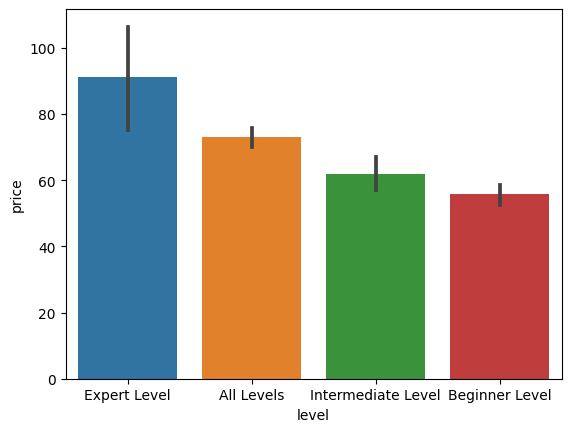

In [148]:
sns.barplot(udemy_courses, x='level', y='price', order=udemy_courses.groupby('level').mean().sort_values('price', ascending=False).index)

En el grafico de arriba, a medida que aumenta el nivel de especialización, la media de los precios tambíen aumenta.

<AxesSubplot: xlabel='level', ylabel='num_subscribers'>

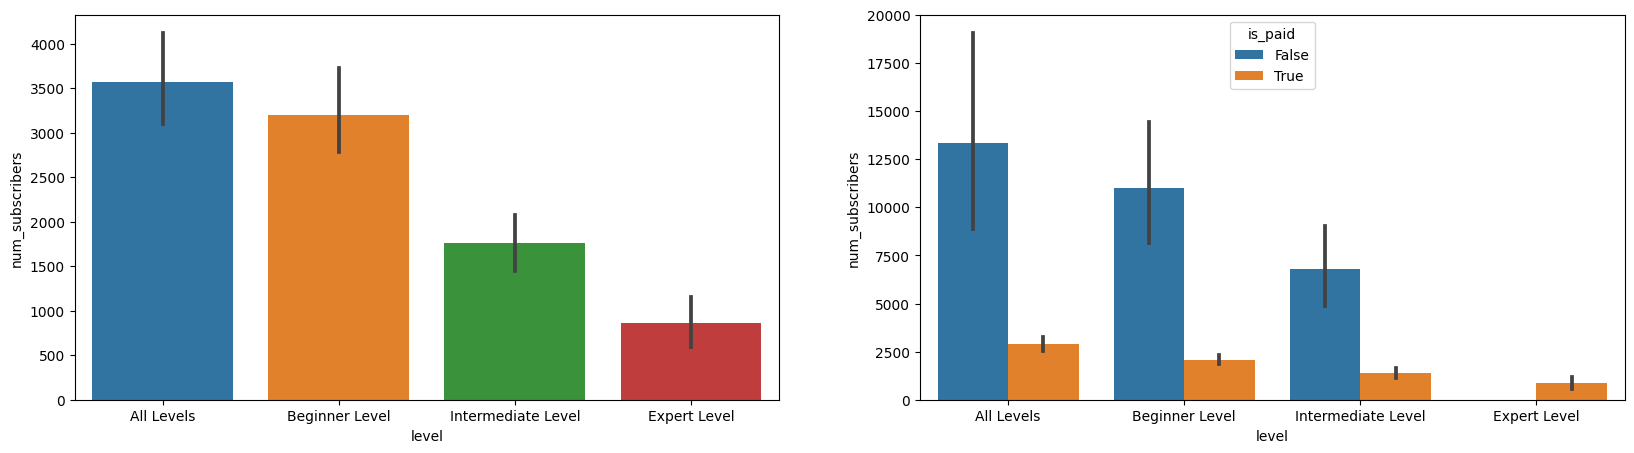

In [132]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
sns.barplot(udemy_courses, x='level', y='num_subscribers', order=udemy_courses.level.value_counts().keys())
plt.subplot(1, 2, 2)
sns.barplot(udemy_courses, x='level', y='num_subscribers', hue='is_paid', order=udemy_courses.level.value_counts().keys())

A medida que aumenta el nivel de especialización, la cantidad de suscriptores decae.

#### Categoría

In [124]:
udemy_gruped = udemy_courses.groupby('subject').mean()
udemy_gruped['course_id'] = udemy_courses.groupby('subject').count()['course_id']

<AxesSubplot: title={'center': 'media de suscriptores en cursos por subject'}, xlabel='num_subscribers', ylabel='subject'>

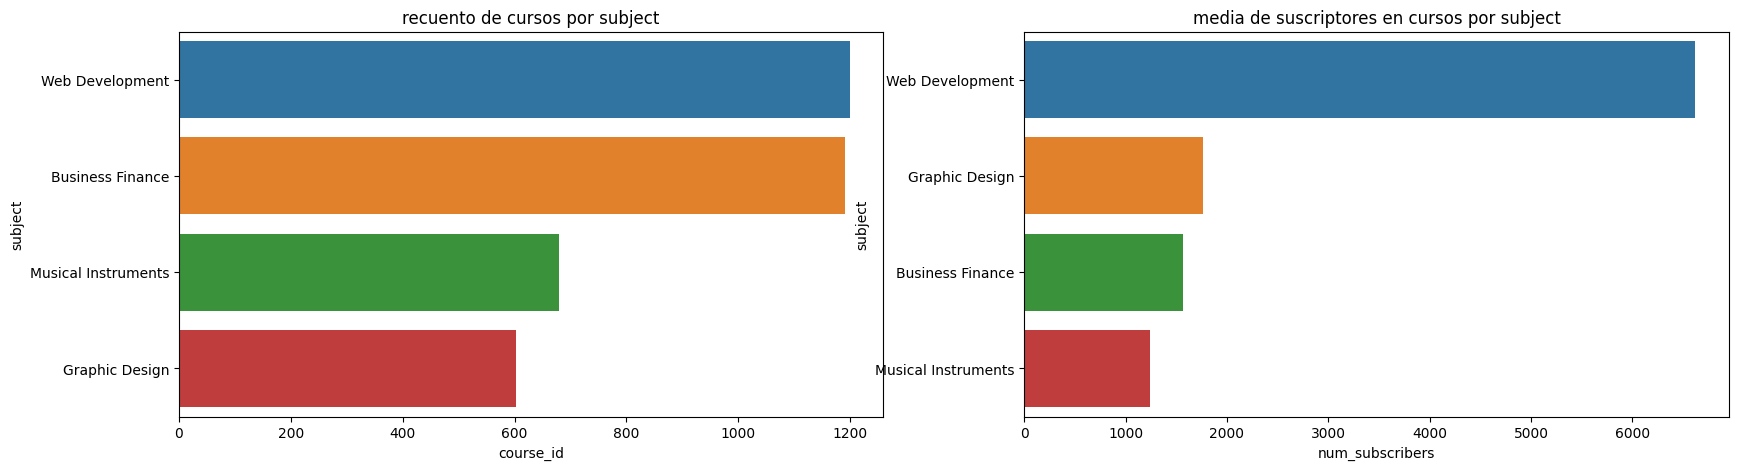

In [135]:
plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.title('recuento de cursos por subject')
sns.barplot(udemy_gruped, y=udemy_gruped.index, x='course_id', order=udemy_gruped.sort_values('course_id', ascending=False).index)
plt.subplot(1, 2, 2)
plt.title('media de suscriptores en cursos por subject')
sns.barplot(udemy_gruped, y=udemy_gruped.index, x='num_subscribers', order=udemy_gruped.sort_values('num_subscribers', ascending=False).index)

Se puede observar que desarrollo web es en promedio muy demandado, y en consecuencia existen muchos cursos de ello. Por otro lado encontramos que existen muchos cursos de Business Finance pero la media de suscriptores es relativamente muy inferior a los cursos de desarrollo web.

In [ ]:
sns.barplot(udemy_courses, y='subject', x='num_subscribers', order=udemy_courses.subject.value_counts().keys())

### mooc_courses

In [36]:
mooc_courses

course_id  \
0                                  NaN   
1                                  NaN   
2                                  NaN   
3                                  NaN   
4                                  NaN   
...                                ...   
5264  accounting-data-analytics-python   
5265                      spectroscopy   
5266               managing-as-a-coach   
5267                hotel-distribution   
5268               data-science-course   

                                                  title is_paid  price  \
0                                   How to Learn Online   False    0.0   
1     Programming for Everybody (Getting Started wit...   False    0.0   
2               CS50's Introduction to Computer Science   False    0.0   
3                                    The Analytics Edge   False    0.0   
4     Marketing Analytics: Marketing Measurement Str...   False    0.0   
...                                                 ...     ...    ...   
5264              Accounting Data Analytics with Python     NaN    NaN   
5265             Introduction to Molecular Spectroscopy     NaN    NaN   
5266                                Managing as a Coach     NaN    NaN   
5267             The fundamentals of hotel distribution     NaN    NaN   
5268                     A Crash Course in Data Science     NaN    NaN   

      num_subscribers  num_reviews  num_lectures         level  \
0            124980.0          NaN           NaN  Introductory   
1            293864.0          NaN           NaN  Introductory   
2           2442271.0          NaN           NaN  Introductory   
3            129555.0          NaN           NaN  Intermediate   
4             81140.0          NaN           NaN  Introductory   
...               ...          ...           ...           ...   
5264              NaN          NaN           NaN           NaN   
5265              NaN          NaN           NaN           NaN   
5266              NaN          NaN           NaN           NaN   
5267              NaN          NaN           NaN           NaN   
5268              NaN          NaN           NaN           NaN   

      content_duration published_timestamp                       subject  \
0                  4.0                 NaT  Education & Teacher Training   
1                 14.0                 NaT              Computer Science   
2                 72.0                 NaT              Computer Science   
3                130.0                 NaT    Data Analysis & Statistics   
4                 20.0                 NaT              Computer Science   
...                ...                 ...                           ...   
5264               NaN                 NaT                           NaN   
5265               NaN                 NaT                           NaN   
5266               NaN                 NaT                           NaN   
5267               NaN                 NaT                           NaN   
5268               NaN                 NaT                           NaN   

                                                summary  \
0     Learn essential strategies for successful onli...   
1     This course is a "no prerequisite" introductio...   
2     An introduction to the intellectual enterprise...   
3     Through inspiring examples and stories, discov...   
4        This course is part of a MicroMasters® Program   
...                                                 ...   
5264                                                NaN   
5265                                                NaN   
5266                                                NaN   
5267                                                NaN   
5268                                                NaN   

                              course_type  \
0                 Self-paced on your time   
1                 Self-paced on your time   
2                 Self-paced on your time   
3     Instructor-led on a course schedul

# KPI